<a href="https://colab.research.google.com/github/tammyhansen/decision_tree/blob/main/decision_tree_exploratory_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Decision Trees

Credit: A. Geron for general approach and E. Braude for starter code


## Based on Palmerpenguins dataset - pip installed in code below


The ‘palmerpenguins’ dataset is described on the GitHub site at https://github.com/allisonhorst/palmerpenguins. This dataset was collected by Dr. Kristen Gorman and the Palmer Station, Antarctica LTER, and it contains physical measurements of three penguin species observed on the Palmer Archipelago.

Chose to use the Palmerpenguins dataset for my exploratory decision tree coding because I like penguins!

In [12]:
# INTENT: System, graphics, file locations prepared AND save_fig() defined

# Python ≥3.5 is required
import sys  #  constants, functions etc. of the Python interpreter - required
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os # functions for interacting portably with OS, e.g., file system

# Install the palmerpenguins module
!pip install palmerpenguins

# Randomness: this output will be same across runs
np.random.seed(42) # "42" is arbitrary (but unchanging)

# mpl is prepared to plot pretty figures inline (for notebook format)
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Constants for where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "decision_trees"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(a_fig_id, a_tight_layout=True, a_fig_extension="png",
             a_resolution=300):
    # Postcondition: plt saved at IMAGES_PATH.<a_fig_id>.<a_fig_extension>

    path = os.path.join(IMAGES_PATH, a_fig_id + "." + a_fig_extension)
    print("Saving figure", a_fig_id)
    if a_tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=a_fig_extension, dpi=a_resolution)

# Training and Visualizing

## First 4 sections - Run with Max Depth = None to see details

## Details


 - features list - define in only one place to ensure the correct order used everywhere
  - put X in a DataFrame to ensure columns are chosen according to the features list
  - encoded the y (target) species labels to numerical values, i.e. y_encoded
  - print out head of penguins data, X features, y species labels, and y_encoded to verify dataset

Note: with max_depth=None this model may be prone to high variance / overfitting to the data. Purpose was to see how deep a 'complete' tree would go.

Results: Found the tree can go to depth=7. This max depth is not practical for creating the decision boundary plots in later sections. This is exploratory only.

In [13]:
# INTENT: Penguins data loaded and decision tree tree_clf constructed for it

from palmerpenguins import load_penguins
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Load the Penguins dataset
penguins = load_penguins()
print("======== Penguins Data ========")
print(penguins.head())

# Drop rows with missing values
penguins.dropna(inplace=True)

# Select features and target variable
features = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm',
            'body_mass_g']

X = penguins[features].values  # Convert to NumPy array for consistency
# Changed to DataFrame to control feature order by feature names
X_df = pd.DataFrame(X, columns=features)

# Print complete X_df data
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)
# print(X_df)  # Uncomment the print to see all the feature data

print("\n======== X = Selected Features ========")
print(X) # It's ok to print original X

y = penguins['species'].values  # Target variable
print("\n======== y = Species Labels ========")
print(y)

# Encode the target variable to numerical values
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
print("\n======== y_encoded = Encoded Species Labels ========")
print(y_encoded)


======== Penguins Data ========
  species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
3  Adelie  Torgersen             NaN            NaN                NaN   
4  Adelie  Torgersen            36.7           19.3              193.0   

   body_mass_g     sex  year  
0       3750.0    male  2007  
1       3800.0  female  2007  
2       3250.0  female  2007  
3          NaN     NaN  2007  
4       3450.0  female  2007  

======== X = Selected Features ========
[[  39.1   18.7  181.  3750. ]
 [  39.5   17.4  186.  3800. ]
 [  40.3   18.   195.  3250. ]
 ...
 [  49.6   18.2  193.  3775. ]
 [  50.8   19.   210.  4100. ]
 [  50.2   18.7  198.  3775. ]]

======== y = Species Labels ========
['Adelie' 'Adelie' 'Adelie' 'Adelie' 'Adelie' 'Adelie' 'Adelie' 'A

# Classifier

## In case Max Depth needs to be changed after first run, no need to re-run the above section.

In [14]:
# Define decision tree classifier
tree_clf = DecisionTreeClassifier(criterion='entropy', max_depth=None,
                                  random_state=42) # definition
# Apply the CART (classification and regression tree) algorithm
tree_clf.fit(X_df, y_encoded)

DecisionTreeClassifier(criterion='entropy', random_state=42)

# Generate Tree

## Graphical Tree Representation

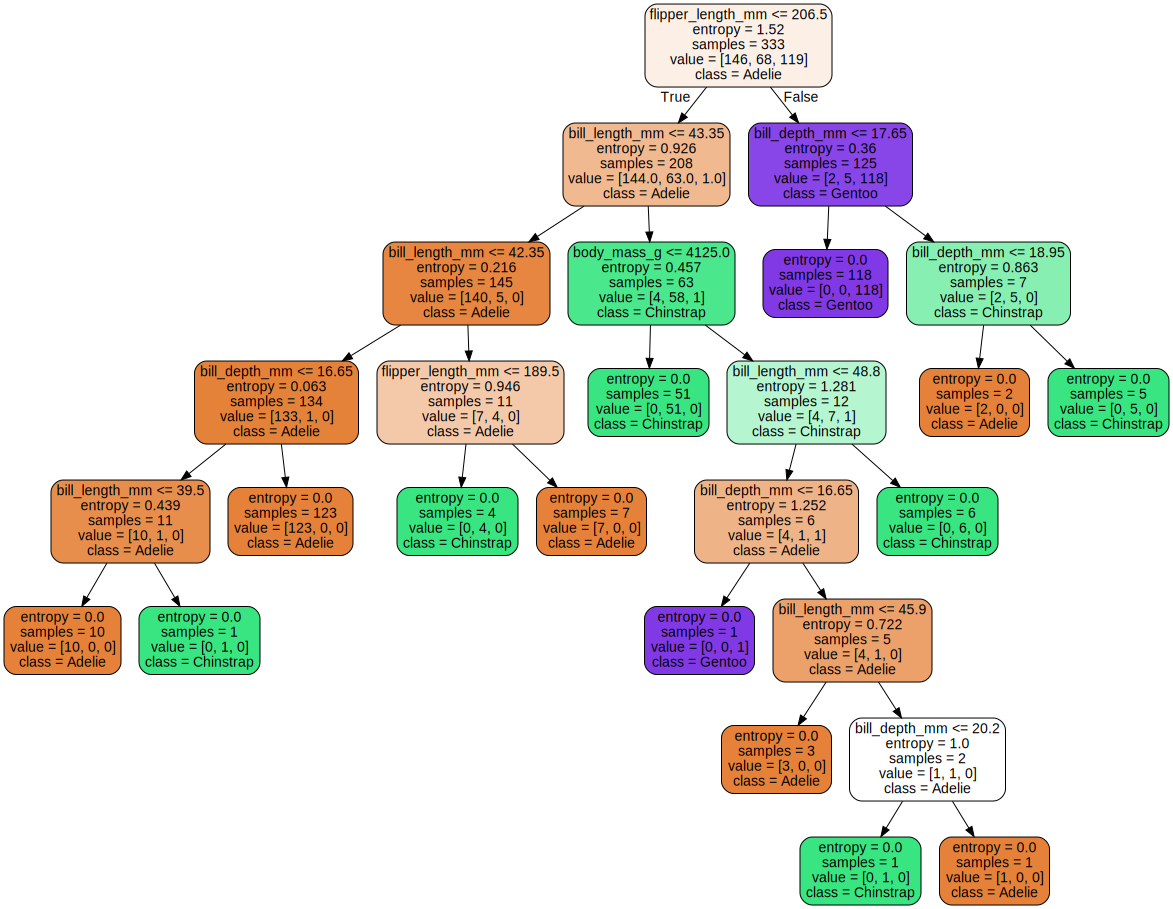

In [15]:
# INTENT: tree_clf visualized

from graphviz import Source # "Graphical visualization"
from sklearn.tree import export_graphviz

# Create the decision tree visualization
export_graphviz(
    tree_clf,
    out_file=os.path.join(IMAGES_PATH, "penguins_tree.dot"),
    feature_names=features,
    class_names=label_encoder.classes_,
    rounded=True,
    filled=True
)

# Display the decision tree
from IPython.display import display
display(Source.from_file(os.path.join(IMAGES_PATH, "penguins_tree.dot")))

# Tree in Printed Form

## A different view of the tree for clarity

In [16]:
# Check the exact features and thresholds used at each split
from sklearn.tree import export_text

tree_rules = export_text(tree_clf, feature_names=features)
print(tree_rules)

|--- flipper_length_mm <= 206.50
|   |--- bill_length_mm <= 43.35
|   |   |--- bill_length_mm <= 42.35
|   |   |   |--- bill_depth_mm <= 16.65
|   |   |   |   |--- bill_length_mm <= 39.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- bill_length_mm >  39.50
|   |   |   |   |   |--- class: 1
|   |   |   |--- bill_depth_mm >  16.65
|   |   |   |   |--- class: 0
|   |   |--- bill_length_mm >  42.35
|   |   |   |--- flipper_length_mm <= 189.50
|   |   |   |   |--- class: 1
|   |   |   |--- flipper_length_mm >  189.50
|   |   |   |   |--- class: 0
|   |--- bill_length_mm >  43.35
|   |   |--- body_mass_g <= 4125.00
|   |   |   |--- class: 1
|   |   |--- body_mass_g >  4125.00
|   |   |   |--- bill_length_mm <= 48.80
|   |   |   |   |--- bill_depth_mm <= 16.65
|   |   |   |   |   |--- class: 2
|   |   |   |   |--- bill_depth_mm >  16.65
|   |   |   |   |   |--- bill_length_mm <= 45.90
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- bill_length_mm >  45.90
|   |   |   

# Decision Boundaries - Run with Max Depth = 2 for Clarity

[('bill_length_mm', 'bill_depth_mm'), ('bill_length_mm', 'flipper_length_mm'), ('bill_length_mm', 'body_mass_g'), ('bill_depth_mm', 'flipper_length_mm'), ('bill_depth_mm', 'body_mass_g'), ('flipper_length_mm', 'body_mass_g')]


------------------------
For features: ['bill_length_mm', 'bill_depth_mm']
------------------------

|--- bill_length_mm <= 42.35
|   |--- bill_depth_mm <= 15.10
|   |   |--- class: 2
|   |--- bill_depth_mm >  15.10
|   |   |--- class: 0
|--- bill_length_mm >  42.35
|   |--- bill_depth_mm <= 16.35
|   |   |--- class: 2
|   |--- bill_depth_mm >  16.35
|   |   |--- class: 1



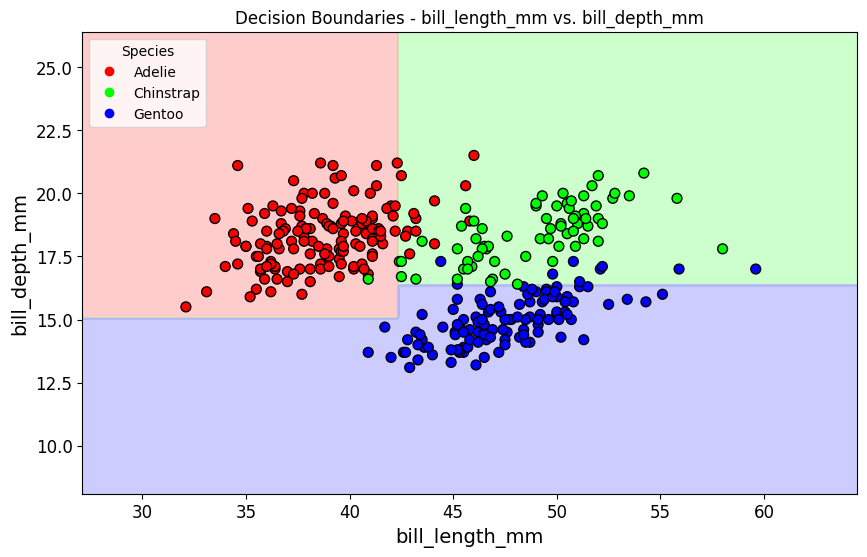



------------------------
For features: ['bill_length_mm', 'flipper_length_mm']
------------------------

|--- flipper_length_mm <= 206.50
|   |--- bill_length_mm <= 43.35
|   |   |--- class: 0
|   |--- bill_length_mm >  43.35
|   |   |--- class: 1
|--- flipper_length_mm >  206.50
|   |--- flipper_length_mm <= 212.50
|   |   |--- class: 2
|   |--- flipper_length_mm >  212.50
|   |   |--- class: 2



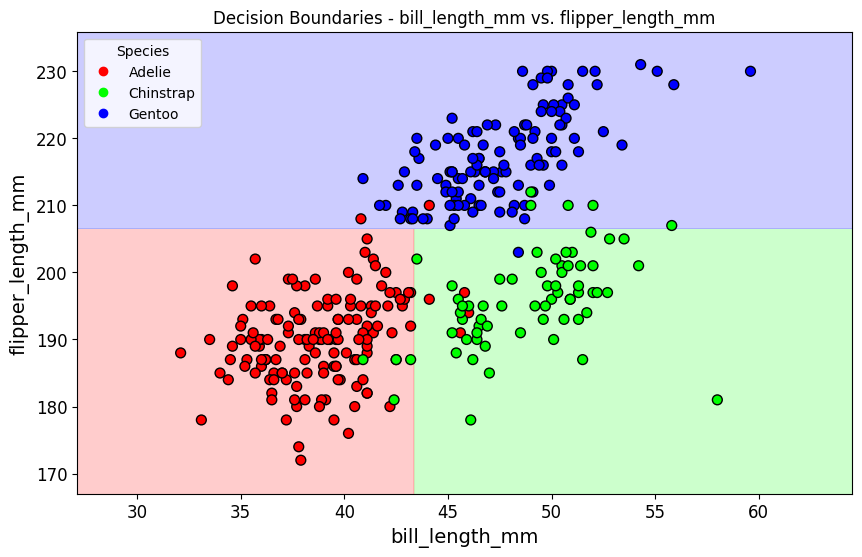



------------------------
For features: ['bill_length_mm', 'body_mass_g']
------------------------

|--- bill_length_mm <= 42.35
|   |--- bill_length_mm <= 40.85
|   |   |--- class: 0
|   |--- bill_length_mm >  40.85
|   |   |--- class: 0
|--- bill_length_mm >  42.35
|   |--- body_mass_g <= 4175.00
|   |   |--- class: 1
|   |--- body_mass_g >  4175.00
|   |   |--- class: 2



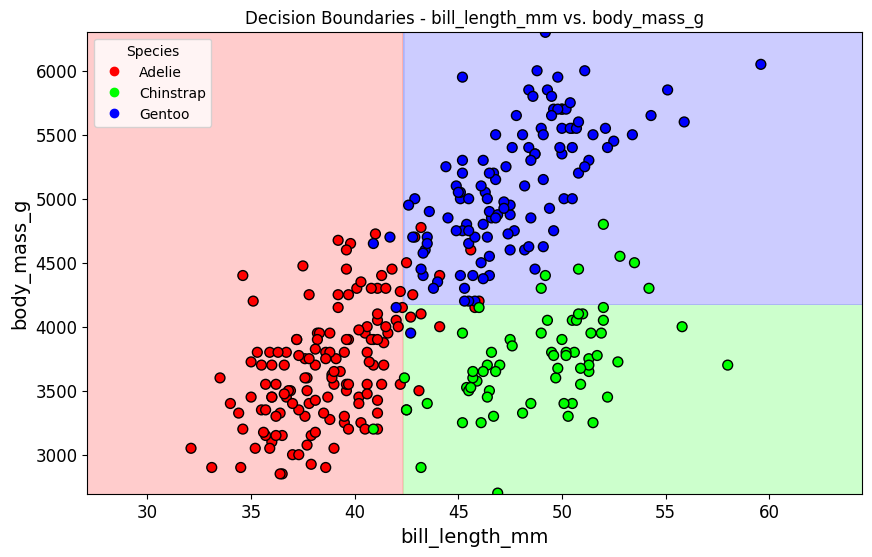



------------------------
For features: ['bill_depth_mm', 'flipper_length_mm']
------------------------

|--- flipper_length_mm <= 206.50
|   |--- flipper_length_mm <= 192.50
|   |   |--- class: 0
|   |--- flipper_length_mm >  192.50
|   |   |--- class: 0
|--- flipper_length_mm >  206.50
|   |--- bill_depth_mm <= 17.65
|   |   |--- class: 2
|   |--- bill_depth_mm >  17.65
|   |   |--- class: 1



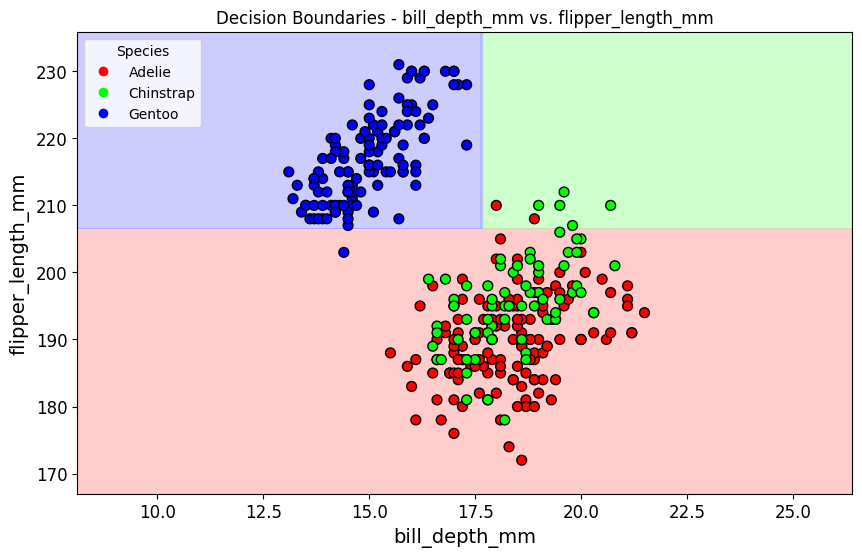



------------------------
For features: ['bill_depth_mm', 'body_mass_g']
------------------------

|--- bill_depth_mm <= 16.35
|   |--- body_mass_g <= 3750.00
|   |   |--- class: 0
|   |--- body_mass_g >  3750.00
|   |   |--- class: 2
|--- bill_depth_mm >  16.35
|   |--- body_mass_g <= 5025.00
|   |   |--- class: 0
|   |--- body_mass_g >  5025.00
|   |   |--- class: 2



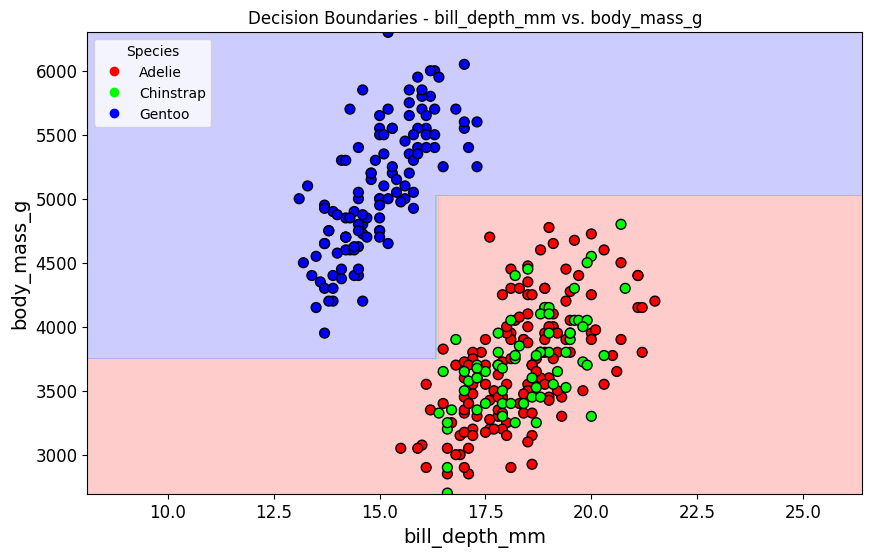



------------------------
For features: ['flipper_length_mm', 'body_mass_g']
------------------------

|--- flipper_length_mm <= 206.50
|   |--- flipper_length_mm <= 192.50
|   |   |--- class: 0
|   |--- flipper_length_mm >  192.50
|   |   |--- class: 0
|--- flipper_length_mm >  206.50
|   |--- body_mass_g <= 4325.00
|   |   |--- class: 2
|   |--- body_mass_g >  4325.00
|   |   |--- class: 2



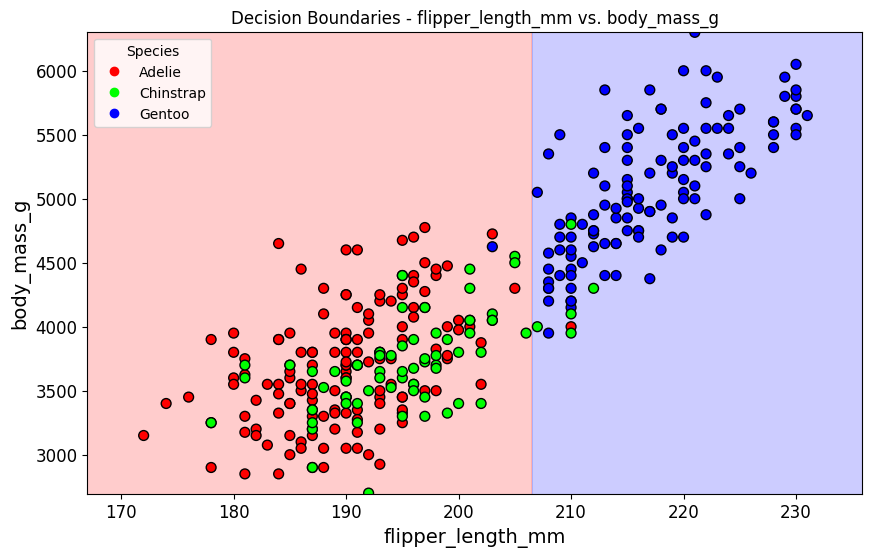

In [17]:
import itertools

# features defined above
# Generate all unique combinations of feature pairs
feature_pairs = list(itertools.combinations(features, 2))
print(feature_pairs)
print()

# Define the function to plot the decision boundaries
def plot_decision_boundaries(X_df, y_encoded, feature_names, classifier, title):
    from matplotlib.colors import ListedColormap
    import numpy as np

    h = 0.1  # Step size in the mesh

    # Create color maps
    #   Light red, green, blue
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
    #   Red, green, blue
    cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

    # Create a meshgrid
    x_min, x_max = X_df[feature_names[0]].min() - 5, X_df[
        feature_names[0]].max() + 5
    y_min, y_max = X_df[feature_names[1]].min() - 5, X_df[
        feature_names[1]].max() + 5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # Predict class for each point in the meshgrid
    mesh_points = np.c_[xx.ravel(), yy.ravel()]
    mesh_df = pd.DataFrame(mesh_points, columns=feature_names)
    Z = classifier.predict(mesh_df)
    Z = Z.reshape(xx.shape)

    # Plotting
    plt.figure(figsize=(10, 6))
    plt.contourf(xx, yy, Z, cmap=cmap_light, alpha=0.6)
    scatter = plt.scatter(X_df[feature_names[0]], X_df[feature_names[1]],
                          c=y_encoded, cmap=cmap_bold, edgecolor='k', s=50)
    plt.xlabel(feature_names[0])
    plt.ylabel(feature_names[1])
    plt.title(title)

    # Create legend using scatter.legend_elements()
    handles, labels = scatter.legend_elements()
    # Extract numerical parts from the formatted strings, map to species names
    species_names = [label_encoder.classes_[int(label.strip(
        '$\\mathdefault{}'))] for label in labels]
    plt.legend(handles, species_names, title="Species", loc="upper left")

    plt.show()


# Train only two features at a time to generate a decision boundaries plot
# Loop through each pair of features
for pair in feature_pairs:
    # Select the features
    feature_names = [pair[0], pair[1]]

    print("\n------------------------")
    print(f"For features: {feature_names}")
    print("------------------------\n")

    # Select only the columns for the current feature pair from X_df
    current_X_df = X_df[list(pair)]

    # Train the classifier
    clf = DecisionTreeClassifier(criterion='entropy', max_depth=2,
                                 random_state=42)
    clf.fit(current_X_df, y_encoded)

    # Print the tree rules for each pair
    tree_rules = export_text(clf, feature_names=feature_names)
    print(tree_rules)

    # Generate the plot title
    title = f'Decision Boundaries - {feature_names[0]} vs. {feature_names[1]}'

    # Plot the decision boundaries
    plot_decision_boundaries(current_X_df, y_encoded, feature_names, clf, title)
    print()


# Plots Results

The plots clearly show that Gentoo is mostly separated from the other two types with little overlap, however the Adelie and Chinstrap penguins show much more overlap.

Specifically in the first plot, bill depth vs. bill length, the three species could be separated even better if boundaries at a slant could be mapped out. However this capability is beyond this simple exploration of the code.

# Validate the Species Results  1/3

## Inputs chosen for a Typical or Ideal data range for each species of penguin.


 - [ [50.0, 15.0, 220.0, 5500.0 ],  # typical Gentoo
 - [39.0, 18.5, 190.0, 3800.0],   # typical Adelie
 - [46.0, 17.0, 195.0, 3700.0] ]  # typical Chinstrap

This will be a boring run because we should get our expected results.


In [18]:
# Training the classifier with numerical labels
tree_clf = DecisionTreeClassifier(criterion='entropy', max_depth=2,
                                  random_state=42)
tree_clf.fit(X_df, y_encoded)

# Inputs for the typical ideal measurements. Let's see what the model predicts!

inputs = [
     [50.0, 15.0, 220.0, 5500.0], # Typical Gentoo penguin
    [39.0, 18.5, 190.0, 3800.0],  # Typical Adelie penguin
    [46.0, 17.0, 195.0, 3700.0]  # Typical Chinstrap penguin

]

# 'features' defined in a previous section. Use same list to ensure same order!

# Predicted species for each input
predicted_species = []

for measurement in inputs:
    # Convert the measurement list to a DataFrame for prediction
    input_df = pd.DataFrame([measurement], columns=features)
    # Predict the species
    species_pred = tree_clf.predict(input_df)
    # Decode the predicted label
    species_name = label_encoder.inverse_transform(species_pred)
    predicted_species.append(species_name[0])

print("Predicted Species for Each Input:")
for i, species in enumerate(predicted_species, 1):
    print(f"Input {i}: {species}")

Predicted Species for Each Input:
Input 1: Gentoo
Input 2: Adelie
Input 3: Chinstrap


# Discussion of Results

Yes indeed the model has predicted the expected species for each input.

See discussion section below for discussions of bias, variance, and irreducible error that is also applicable for this section.



---



# Validate the Species Results  2/3

## Inputs were interpolated between data points in the Murky data range of overlaps between Gentoo and Chinstrap based on bill length and bill width.

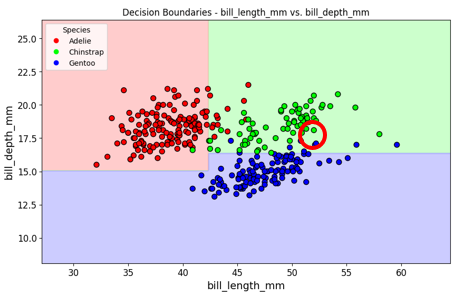

Existing data in the range:
- [52.1, 17.0, 230.0, 5550.0] - Chinstrap
- [52.2, 17.1, 228.0, 5400.0] - Chinstrap
- [50.1, 17.9, 190.0, 3400.0] - Gentoo
- [52.2, 18.8, 197.0, 3450.0] - Gentoo

Interpolated inputs for 'new' unclassified penguins:
     [51.5, 17.2, 220.0, 5000.0]
     [51.7, 17.4, 210.0, 4500.0]
     [52.0, 17.5, 200.0, 4000.0]

These are close in bill dimensions but quite different in flipper length and body mass. What will the decision tree classifier decide for a couple of inputs between these values?




In [19]:
# Training the classifier with numerical labels
tree_clf = DecisionTreeClassifier(criterion='entropy', max_depth=2,
                                  random_state=42)
tree_clf.fit(X_df, y_encoded)

# Inputs for the typical ideal measurements. Let's see what the model predicts!

inputs = [
     [51.5, 17.2, 220.0, 5000.0],
     [51.7, 17.4, 210.0, 4500.0],
     [52.0, 17.5, 200.0, 4000.0]
]

# 'features' defined in a previous section. Use same list to ensure same order!

# Predicted species for each input
predicted_species = []

for measurement in inputs:
    # Convert the measurement list to a DataFrame for prediction
    input_df = pd.DataFrame([measurement], columns=features)
    # Predict the species
    species_pred = tree_clf.predict(input_df)
    # Decode the predicted label
    species_name = label_encoder.inverse_transform(species_pred)
    predicted_species.append(species_name[0])

print("Predicted Species for Each Input:")
for i, species in enumerate(predicted_species, 1):
    print(f"Input {i}: {species}")

Predicted Species for Each Input:
Input 1: Gentoo
Input 2: Gentoo
Input 3: Chinstrap


# Discussion of Results

Note: This discussion generally applies to the other two Validate sections as well.


•	Bias (Underfitting ):

If the model had high bias, it would make overly simplistic predictions that do not reflect subtle differences in feature values. The decision tree correctly predicts Gentoo for the first two inputs and Chinstrap for the third. This suggests that the model has learned sufficient detail in its structure to handle these cases and is not overly simplifying the problem. The predictions are valid as the tree depth allows for enough complexity to capture these distinctions.

•	Variance (Overfitting):

If the model were overfitting, you might expect inconsistent predictions or highly detailed splits that react differently to similar inputs.The fact that the model predicts Gentoo for the first two inputs and Chinstrap for the last implies that it captures the general trend of the data and does not simply memorize training instances. This shows that the model maintains a balance in variance, making its output valid for these inputs.

•	Irreducible Error:

The measurements of bill length, bill depth, flipper length, and body mass near the decision boundaries may be subject to noise or slight measurement inaccuracies in the dataset. However, these inputs were chosen to represent data points that are close but not overly ambiguous, which helps minimize the impact of irreducible error. The model's predictions are consistent with known penguin characteristics. For example, Gentoo penguins generally have larger body mass and flipper length compared to Chinstrap penguins. The third input, which is closer to typical Chinstrap values, was predicted as Chinstrap, indicating that the model can effectively use all features for classification despite potential noise in the data.

Speaking of noise... These is a section below where noise is deliberately introduced into the data to see how the model responds.



---





# Validate the Species Results  3/3

## Similar to previous but in a different region of data overlap, of flipper length vs. bill length.

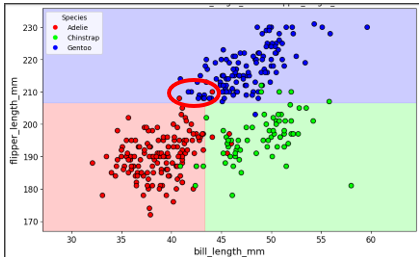

Original data in range:
 - [44.1, 18.0, 210.0, 4000.0] - Adelie
 - [40.8, 18.9, 208.0, 4300.0] - Adelie
 - [42.0, 13.5, 210.0, 4150.0] - Gentoo
 - [42.8, 14.2, 209.0, 4700.0] – Gentoo

Inputs for 'new' unclassified penguins:
 - [41.0, 14.0, 208.0, 4100.0]
 - [42.0, 15.0, 209.0, 4300.0]
 - [43.0, 17.0, 210.0, 4500.0]
 - [42.0, 18.0, 209.0, 4250.0]




In [20]:
# Training the classifier with numerical labels
tree_clf = DecisionTreeClassifier(criterion='entropy', max_depth=2,
                                  random_state=42)
tree_clf.fit(X_df, y_encoded)

# Inputs for the typical ideal measurements. Let's see what the model predicts!

inputs = [
    [41.0, 14.0, 208.0, 4100.0],
    [42.0, 15.0, 209.0, 4300.0],
    [43.0, 17.0, 210.0, 4500.0],
    [42.0, 18.0, 209.0, 4250.0]
    ]


# 'features' defined in a previous section. Use same list to ensure same order!

# Predicted species for each input
predicted_species = []

for measurement in inputs:
    # Convert the measurement list to a DataFrame for prediction
    input_df = pd.DataFrame([measurement], columns=features)
    # Predict the species
    species_pred = tree_clf.predict(input_df)
    # Decode the predicted label
    species_name = label_encoder.inverse_transform(species_pred)
    predicted_species.append(species_name[0])

print("Predicted Species for Each Input:")
for i, species in enumerate(predicted_species, 1):
    print(f"Input {i}: {species}")

Predicted Species for Each Input:
Input 1: Gentoo
Input 2: Gentoo
Input 3: Gentoo
Input 4: Chinstrap


# Discussion of Results

The results surprised me a bit: I had expected at first to find a majority of Gentoo penguins and perhaps one Adelie, because the data range of interest is so close to the Adelie/Gentoo border (see image in inputs above).

However the model does not think like a human: it does not matter how 'close' visually a data border is or how I'm looking at it and assuming the underlying data patterns. The model must've considered input 4 to have crossed the border between Gentoo and Chinstrap without me deliberately intending a Chinstrap result.



---



# Add Noise

## 'Altered Data' dataset created from original, starting with a noise factor of 0.01 (1% of mean value).



In [21]:
import numpy as np
import random

# Set a random seed for reproducibility
np.random.seed(42)

# Define the amount of noise (e.g., 1% of the mean value of each feature)
noise_factor = 0.01

# Add noise to all features
penguins_noisy = penguins.copy()
for feature in features:
    mean_value = penguins_noisy[feature].mean()
    noise = np.random.normal(0, noise_factor * mean_value, size=penguins_noisy[
        feature].shape)
    penguins_noisy[feature] += noise

# Check how the noise affected the data
print(penguins_noisy[features].head())

# Re-train the model with the noisy data
X_noisy = penguins_noisy[features].values
X_df_noisy = pd.DataFrame(X_noisy, columns=features)
y_encoded_noisy = label_encoder.fit_transform(penguins_noisy['species'])

# Train the classifier with noisy data
tree_clf_noisy = DecisionTreeClassifier(criterion='entropy', max_depth=None,
                                        random_state=42)
tree_clf_noisy.fit(X_df_noisy, y_encoded_noisy)

# Predict with the updated model
for i, measurement in enumerate(inputs, 1):
    input_df = pd.DataFrame([measurement], columns=features)
    predicted_class = tree_clf_noisy.predict(input_df)
    pred_species_name = label_encoder.inverse_transform(predicted_class)
    outstring = f"{measurement}: {predicted_class[0]} - {pred_species_name[0]}"
    print(f"Predicted species for Input {i}" + outstring)


   bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g
0       39.318518      18.583766         180.487580  3774.088884
1       39.439174      17.567378         189.022529  3858.871682
2       40.584936      17.974758         189.672426  3288.899867
4       37.370023      19.158305         195.193568  3452.508684
5       39.196989      20.544835         192.504220  3622.783001
Predicted species for Input 1[41.0, 14.0, 208.0, 4100.0]: 2 - Gentoo
Predicted species for Input 2[42.0, 15.0, 209.0, 4300.0]: 2 - Gentoo
Predicted species for Input 3[43.0, 17.0, 210.0, 4500.0]: 2 - Gentoo
Predicted species for Input 4[42.0, 18.0, 209.0, 4250.0]: 0 - Adelie


# Discussion of Results

Thought this might be too low to show an appreciable effect on the results, but this amount of noise did have a noticeable effect on the results.

The inputs were the same as was used in Validate the Species 3/3 above, except with noise added. The noise factor of 0.01 sounds small but this was enough to change the results for Output 4 from Chinstrap to Adelie.

"The noise added to the training data introduced slight variations in the feature distributions, which  affected the model's learned decision boundaries. This change made the model more sensitive to subtle differences between species in overlapping regions, leading to a different classification for Input 4."

Interestingly, this has changed the results to what I originally expected in the Validate 3/3 above.



---



# Deliberately Corrupted Data

## Duplicated a few lines of existing data but with switched species labels. The new dataset now contains 4 lines of original data plus 4 additional identical lines, one set identified as Adelie and the other as Gentoo.

In [22]:
# Select the data points to duplicate
data_to_duplicate = pd.DataFrame([
    [44.1, 18.0, 210.0, 4000.0, 'Adelie'],
    [40.8, 18.9, 208.0, 4300.0, 'Adelie'],
    [42.0, 13.5, 210.0, 4150.0, 'Gentoo'],
    [42.8, 14.2, 209.0, 4700.0, 'Gentoo']
], columns=['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm',
            'body_mass_g', 'species'])

# Reverse the species labels
data_to_duplicate['species'] = data_to_duplicate['species'].apply(
    lambda x: 'Gentoo' if x == 'Adelie' else 'Adelie')

# Append the modified data to the existing dataset
penguins_augmented = pd.concat([penguins, data_to_duplicate], ignore_index=True)

# Check the new data to ensure it was added
print(penguins_augmented[['bill_length_mm', 'bill_depth_mm',
                          'flipper_length_mm', 'body_mass_g', 'species']
                         ].tail())


# Re-encode the target variable
y_augmented = label_encoder.fit_transform(penguins_augmented['species'])

# Train the classifier with the augmented dataset
X_augmented = penguins_augmented[features].values
X_df_augmented = pd.DataFrame(X_augmented, columns=features)

tree_clf_augmented = DecisionTreeClassifier(criterion='entropy', max_depth=None,
                                            random_state=42)
tree_clf_augmented.fit(X_df_augmented, y_augmented)

# Test the model with your input data
for i, measurement in enumerate(inputs, 1):
    input_df = pd.DataFrame([measurement], columns=features)
    predicted_class = tree_clf_augmented.predict(input_df)
    pred_species_name = label_encoder.inverse_transform(predicted_class)
    outstring = f"{measurement}: {predicted_class[0]} - {pred_species_name[0]}"
    print(f"Predicted species for Input {i}" + outstring)


     bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g    species
332            50.2           18.7              198.0       3775.0  Chinstrap
333            44.1           18.0              210.0       4000.0     Gentoo
334            40.8           18.9              208.0       4300.0     Gentoo
335            42.0           13.5              210.0       4150.0     Adelie
336            42.8           14.2              209.0       4700.0     Adelie
Predicted species for Input 1[41.0, 14.0, 208.0, 4100.0]: 2 - Gentoo
Predicted species for Input 2[42.0, 15.0, 209.0, 4300.0]: 0 - Adelie
Predicted species for Input 3[43.0, 17.0, 210.0, 4500.0]: 0 - Adelie
Predicted species for Input 4[42.0, 18.0, 209.0, 4250.0]: 0 - Adelie


# Discussion of Results

Originally the first three inputs were Gentoo and the last was Chinstrap. Now with the conflicting data the first was Gentoo and the other three were Adelie.

"The addition of contradictory data caused the decision tree to learn misleading rules. By including  samples with features that had two different species assigned to the same data, the model's decision boundaries became confused. The reversed labels introduced conflicting information, altering the model's interpretation of which feature combinations belong to which species. As a result, the model became more sensitive to inconsistent data (higher variance)."



---




# Pros and Cons of using Decision Tree for the Palmerpenguins data exploration

## Pro’s of decision tree usage

- Interpretability: Decision trees are highly interpretable, making it easy to visualize and understand  the classification rules for the penguin species based on features like bill length, bill depth, flipper length, and body mass. This interpretability is valuable when explaining the model's decisions to non-experts.
- Non-Linear Boundaries: Decision trees can create non-linear decision boundaries, which is beneficial for the penguin dataset as the relationships between features and species classifications are complex and non-linear.
- Feature Importance: The decision tree highlights which features contribute the most to classification. This is useful for understanding which physical characteristics (e.g., flipper length or bill depth) play a significant role in distinguishing between penguin species.

## Con’s of decision tree usage
- Sensitivity to Overlap and Outliers: The penguin dataset naturally contains overlap between species , as some measurements of different species fall close to each other or are outliers. Decision trees can struggle in these regions, leading to less reliable predictions when the data points are near the overlap.
- Prone to Overfitting: Decision trees, especially without a specified max_depth, can easily overfit the training data by creating overly complex rules. While this might lead to high accuracy on training data, it can reduce performance on new, unseen data.
- Data Sensitivity: Small changes in the dataset, such as adding noise or modifying labels, can lead to significant changes in the tree structure and predictions. This variability can be problematic when working with real-world data that may contain inconsistencies or noise.
- Interpretability Limitations for Deep Trees: While shallow trees are easy to interpret, decision trees that grow too deep become complex, making them harder to visualize and understand.
